<a href="https://colab.research.google.com/github/AaronSchram22/AdvLinearAlgebra/blob/master/Copy_of_Project_4_Case_3_An_Interesting_Case_using_Singular_Values_and_Best_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
#from scipy import misc
from scipy import linalg
#from PIL import Image
#import imageio
import matplotlib.pyplot as plt
# importing "random" for random operations 
import random 

#  Singular Value Decomposition and Best Fit

We look at some data generated here from three sources:

*   Case 0:  A known polynomial function $f(x) = 4 - 3x^2 + 5x^6$
*   Case 1:  A known trigonometric function $f(x) = 4 - 2\cos(x) + \cos^2 (x)$
*   Case 2:  A matrix of data $M$ (specified below) with unknown source function
*   Case 3:  An interesting case.

# Overview for Case 3:  An interesting case:

For Case 3, you have the option of completing one of the following tasks:

* **Option A:**  Re-do Case 0 or Case 1 by adding noise to the function.

Using $f$ + (2*random.random()-1)  will add a random number between -1 and 1 to the value of $f$.  How much noise can your method absorb and still produce accurate results?  (e.g. noise with a range of $-1$ to $1$?  noise from a range of $-5$ to $5$?  noise from $-30$ to $30$?)  Which method (best-fit or SVD) accommodates a larger range of error?

* **Option B:**  Best Fit for a plane

Instead of matching a function $x \to f(x)$ using a 8th degree polynomial, make a multivariable function $(x_1,x_2) \to f(x_1,x_2)$ where $f$ is a 3rd degree polynomial in $x_1$ and $x_2$. Generate data based on at least 16 different input points. Modify the procedure for choosing the $M$ matrix, and use Best Fit to find the best fit line. 


BONUS for Option B:  Do this for 3 dimensions, with noise, or modify the SVD solution to fit this option

* **Option C:**  The space of continuous functions of one variable has two different bases:


Given an unknown function, we figured out how to write it using basis of polynomials.  We could also have determined how to write it as a basis of powers of sine and cosine functions. Fit the polynomial $f(x) = 4 - 3x^2 + 5x^6$ to a basis of sine & cosine functions of at most power 4. Plot the original function and the best-fit function.

BONUS for Option C:  Include noise via $f(x)$ + (2*random.random()-1), and find a way to measure the error in your approximation to the function f(x).  What is the effect of this noise on your approximation?


In each case, it may be helpful to re-use data from the previous cases by copy-and-paste into cells below.  Be sure to specify which option you are addressing.

In [0]:
# Option A: Re-do Case 0 by adding noise to the function




In [0]:
#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = [] 
actual_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(7):
    # pick a random number between -5 and 5
    x = 6*random.random() - 3 
    f = 4 - 3*x**2 + 5*x**6 +((30*random.random()-15))
    actual_data_x.append(x)
    actual_data_y.append(f)

In [331]:
# uncomment code below  to look at the data in actual_data_x or in actual_data_y

#actual_data_x
actual_data_y

[388.0238913213244,
 1072.413900490326,
 23.92148601634848,
 -7.337932253902253,
 42.2754644956064,
 13.79479508502482,
 174.5789191065324]

In [0]:
#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = (np.matrix(actual_data_y)).transpose()

In [333]:
# Uncomment either line below to show the matrix M
# or the first five entries of b

M
b[:5]

matrix([[ 388.02389132],
        [1072.41390049],
        [  23.92148602],
        [  -7.33793225],
        [  42.2754645 ]])

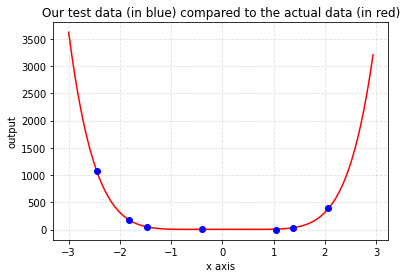

In [334]:
# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6


# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')


In [335]:
#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b
c


matrix([[ 12.82700398],
        [-16.16790298],
        [-32.09045123],
        [ 11.85128784],
        [ 13.85031085],
        [ -1.8775343 ],
        [  3.31498571]])

In [336]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

4.933210473306508e-10

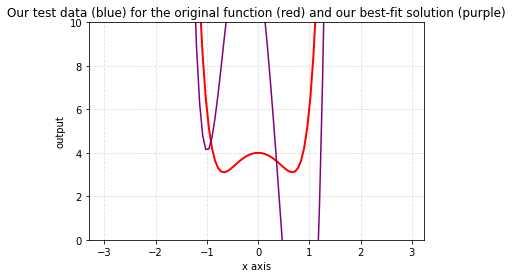

In [337]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='purple')

#Restrict the output values to this range:
plt.ylim(0,10)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (purple)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

In [339]:
#  Uncomment the lines below to show the matrix U, S, and Vh:
#  Notice that in S only the singular values are stored, not the entire matrix.
U
S
Vh

array([[-0.00580971,  0.01073294, -0.19684802, -0.29536049, -0.86019697,
        -0.05122076,  0.36235577],
       [ 0.00862179,  0.04644941,  0.16442508, -0.54302963,  0.32963679,
         0.55714408,  0.50673601],
       [-0.03009957,  0.03721478, -0.42870813, -0.29984338, -0.11183347,
         0.50933899, -0.67236852],
       [ 0.05155272,  0.20095827,  0.33406363, -0.68043833,  0.05934499,
        -0.53034639, -0.3123686 ],
       [-0.16483243,  0.12080132, -0.78120454, -0.15652748,  0.36016654,
        -0.36557813,  0.24512981],
       [ 0.31300632,  0.92317601, -0.01365198,  0.19176501, -0.04195017,
         0.09694216,  0.04068534],
       [-0.93337321,  0.29851496,  0.16840184,  0.06086016, -0.06238952,
         0.0568177 , -0.02279071]])

In [340]:
#  The 2nd singular value is:
S[1]

65.32415028627243

In [341]:
# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

True

In [0]:
#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 5

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

In [343]:
#  We should be able to figure out the size of U and Vh that we'll use:
#
#  U S Vh  =   [         .     ] [             .         ]  [            .      ]
#              [ U_use   .     ] [  sigma_use  .         ]  [   Vh_use   .      ]
#              [         . U_d ] [.......................]  [            . Vh_d ]
#              [         .     ] [             . sigma_d ]  [            .      ]
#
#
#  Uncomment these lines (one at a time) to check that U_use, sigma_use, and Vh_use are the right sizes, as well as U_d, sigma_d, and Vh_d
U_use.shape
sigma_use.shape
Vh_use.shape
U_d.shape
sigma_d.shape
Vh_d.shape

(7, 2)

In [344]:
#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[ 4.5461579 ],
        [-4.26222545],
        [-1.25010284],
        [-2.46903975],
        [-4.11244232],
        [ 1.0284994 ],
        [ 5.83774487]])

In [345]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

14.474645354266096

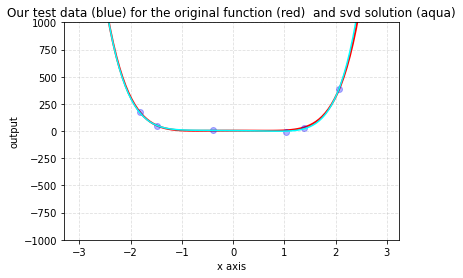

In [346]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata, svd_fit, 'aqua')

#Restrict the output values to this range:
plt.ylim(-1000,1000)
# Add a title
plt.title('Our test data (blue) for the original function (red)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

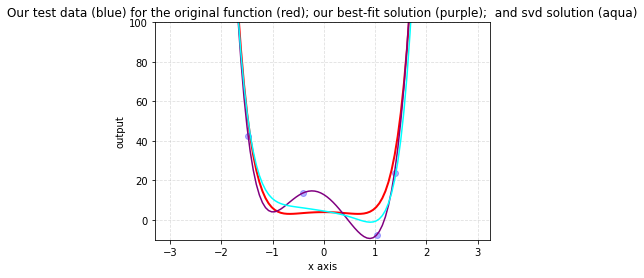

In [347]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from bestfit:
best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)

# Create the actual plot in red, and our datapoints in blue,
# the best-fit method in green, and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata,best_fit, color='purple') + plt.plot(xdata, svd_fit, 'aqua')


#Restrict the output values to this range:
plt.ylim(-10,100)
# Add a title
plt.title('Our test data (blue) for the original function (red); our best-fit solution (purple);  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
# At first try of using my orignal solution code for noise with a range of  −1  to  1 where singular values equals 5 and data points used equals 7.
# Using noise of -1 to 1, we see that the svd solution has an error of about 1.62, while the best-fit retains the error of about zero. The svd solution mathces the actual line fairly well, while
# the best-fit line has already become less accurate.
# using noise of -5 to 5, we see that our error with the svd solution has increased slightly, but it has stayed reltively close to the actual line, while the best-line is starting to get way off.
# using noise of -15 to 15, we see that the error in the svd solution has jumped to the 5 range, and it is starting to match the actual line less, but it is still more accurate than the best-fit line.
# using noise of -30 to 30, we see that the error in the svd solution has jumped all the way to about 30, and it no longer matches the actual line very well, and the best-fit is horribly off.
# using noise of -100 to 100, we see that the error in the svd solution ahs jumed up to about 57, and both models are really off, but it appears that the svd solution is more accurate.
# It would appear that the svd solution is still kind of accurate at noise of -15 to 15 with an error of about 5, so I would say that this is probably the max amount of noise the model can hadel, before it
# starts to get really unstable. Looking at the graph, it looks like the same function still but just tilted on the ends.
# Clearly the svd solution model was far surpeior than the best-fit solution model at larger amounts of noise. It seemed to be pulled less by the noise, while the best-fit really took off with it.
# overall, the best-fit was better without noise, but it used all of data. This made it more vunerable to error, so the svd was far better, because it only used the important parts of the data.
# This means that the svd model is much less vulnerable to error than the best-fit model.
